In [2]:
import os
from pathlib import Path
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

In [3]:
parent = os.path.join(Path(os.getcwd()).parent)

sys.path.append(parent)

from utils.results import SimulationResults

In [ ]:
save_path = Path("C:/Users/bruij_kn/OneDrive - Stichting Deltares/Documents/GitHub/msc-thesis/Figures/Python")

In [ ]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Load in datasets of different modelling runs.

In [36]:
# load in the modelling results
# results_folder = Path(r"P:\11210070-usgscoop-202324-arcticxb\runs\val_gt1")

runid2 = 'val_gt13'
runid3 = 'val_gt13'
runid4 = 'val_gt13'

fname_gt2 = runid2 + "_ground_temperature_timeseries.csv"
fname_gt3 = runid3 + "_ground_temperature_timeseries.csv"
fname_gt4 = runid4 + "_ground_temperature_timeseries.csv"

# df_model = pd.read_csv(os.path.join(results_folder, fname), parse_dates=['time'])
df_gt2 = pd.read_csv(fname_gt2, parse_dates=['time'])
df_gt3 = pd.read_csv(fname_gt3, parse_dates=['time'])
df_gt4 = pd.read_csv(fname_gt4, parse_dates=['time'])

# Lets add some columns to convert to Celcius
colnames = ['temp_0m[K]', 'temp_0.5m[K]', 'temp_1.0m[K]', 'temp_2.0m[K]', 'temp_2.95m[K]']

for df in [df_gt2, df_gt3, df_gt4]:
    for colname in colnames:
        
        df[f'{colname[:-3]}[C]'] = df[colname] - 273.15

df_gt2.head()

,Unnamed: 0,time,air_temp[K],temp_0m[K],temp_0.5m[K],temp_1.0m[K],temp_2.0m[K],temp_2.95m[K],total_heat_flux[W/m2],long_wave_radiation_flux[W/m2],solar_radiation_flux[W/m2],latent_heat_flux[W/m2],convective_heat_flux[W/m2],temp_0m[C],temp_0.5m[C],temp_1.0m[C],temp_2.0m[C],temp_2.95m[C]
0,0,2011-07-09 00:00:00,277.133902,271.65,271.641946,270.436577,268.428806,266.998216,0.000000,0.000000,0.000000,0.000000,0.000000,-1.5,-1.508054,-2.713423,-4.721194,-6.151784
1,1,2011-07-09 01:00:00,277.133902,273.15,271.607198,270.443111,268.435243,267.018140,607.158557,-72.667962,493.768977,-38.515258,224.572800,0.0,-1.542802,-2.706889,-4.714757,-6.131860
2,2,2011-07-09 02:00:00,276.575768,273.15,271.581065,270.447852,268.439987,267.033567,494.320330,-60.143014,402.297623,-34.166994,186.332714,0.0,-1.568935,-2.702148,-4.710013,-6.116433
3,3,2011-07-09 03:00:00,276.441651,273.15,271.560398,270.451547,268.443735,267.046224,418.415051,-69.077919,355.984296,-30.833942,162.342617,0.0,-1.589602,-2.698453,-4.706265,-6.103776
4,4,2011-07-09 04:00:00,275.380062,273.15,271.543423,270.454589,268.446863,267.057073,315.882673,-66.393253,300.114412,-25.734698,107.896212,0.0,-1.606577,-2.695411,-4.703137,-6.092927


Load in measured data.

In [37]:
# load in Erikson data
df_erikson = pd.read_csv(
    os.path.join(parent, Path(r"database\raw_datasets\erikson\Groundtemperatu\BTI_2011TimeSeriesData_GroundTemperature.csv")),
    )

# parse dates
df_erikson['time'] = pd.to_datetime(df_erikson[["year", "month", "day", "hour", "minute"]])

# only keep data from site BL01, BL02, BL03, BL04 (these are the ones on the center bottom dataset)
site_ids = ['BL01', 'BL02', 'BL03', 'BL04']
df_erikson = df_erikson[df_erikson['SiteID'].isin(site_ids)]

# lets have a look
display(df_erikson.head())
display(df_erikson.tail())

,SiteID,Instrument,Longitude,Latitude,year,month,day,hour,minute,Tair,T10cm,T15cm,T30cm,T50cm,T60cm,T90cm,T100cm,T200cm,T295cm,time
0,BL01,HOBO,-143.77901,70.08405,2011,7,8,7,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,2011-07-08 07:00:00
1,BL01,HOBO,-143.77901,70.08405,2011,7,8,8,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,2011-07-08 08:00:00
2,BL01,HOBO,-143.77901,70.08405,2011,7,8,9,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,2011-07-08 09:00:00
3,BL01,HOBO,-143.77901,70.08405,2011,7,8,10,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,2011-07-08 10:00:00
4,BL01,HOBO,-143.77901,70.08405,2011,7,8,11,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,2011-07-08 11:00:00


,SiteID,Instrument,Longitude,Latitude,year,month,day,hour,minute,Tair,T10cm,T15cm,T30cm,T50cm,T60cm,T90cm,T100cm,T200cm,T295cm,time
7878,BL04,HOBO,-143.77947,70.084211,2011,9,28,15,0,-0.5,NaN,NaN,-0.5,NaN,-0.5,-0.5,NaN,NaN,NaN,2011-09-28 15:00:00
7879,BL04,HOBO,-143.77947,70.084211,2011,9,28,16,0,-0.5,NaN,NaN,-0.4,NaN,-0.5,-0.5,NaN,NaN,NaN,2011-09-28 16:00:00
7880,BL04,HOBO,-143.77947,70.084211,2011,9,28,17,0,-0.4,NaN,NaN,-0.3,NaN,-0.4,-0.4,NaN,NaN,NaN,2011-09-28 17:00:00
7881,BL04,HOBO,-143.77947,70.084211,2011,9,28,18,0,-0.2,NaN,NaN,-0.1,NaN,-0.1,-0.2,NaN,NaN,NaN,2011-09-28 18:00:00
7882,BL04,HOBO,-143.77947,70.084211,2011,9,28,19,0,0.9,NaN,NaN,1.5,NaN,1.5,1.2,NaN,NaN,NaN,2011-09-28 19:00:00


In [38]:
# Let's for now stick with only BL01
df_erikson = df_erikson[df_erikson['SiteID'].isin(['BL01'])]

df_erikson.head()
print(df_erikson.columns)

Index(['SiteID', 'Instrument', 'Longitude', 'Latitude', 'year', 'month', 'day',
       'hour', 'minute', 'Tair', 'T10cm', 'T15cm', 'T30cm', 'T50cm', 'T60cm',
       'T90cm', 'T100cm', 'T200cm', 'T295cm', 'time'],
      dtype='object')


In [39]:
# make sure we're looking at the correct time frame
t_start = df_erikson.time.values[0]
t_end = df_erikson.time.values[-1]

for df in [df_gt2, df_gt3, df_gt4]:
    mask = (df['time'] >= t_start) * (df['time'] <= t_end)    
    df = df[mask]

Plot temperature at different layers for different modelling runs, combined with the measured data.

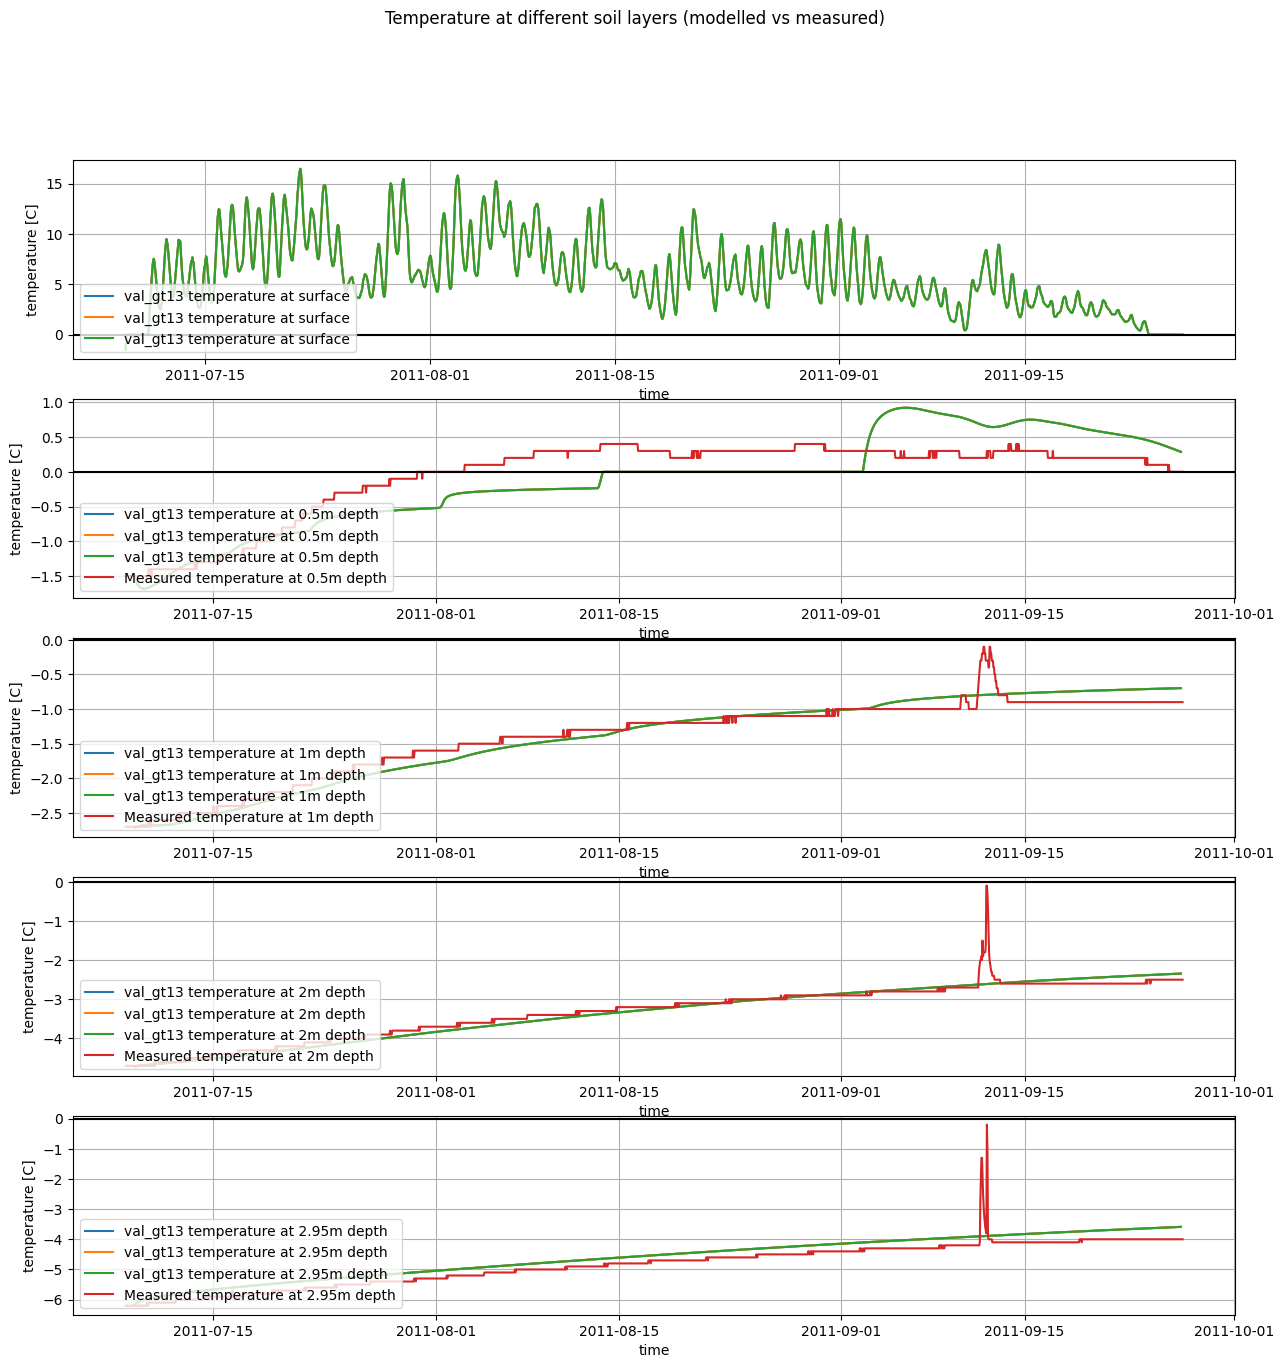

In [40]:
fig, axs = plt.subplots(5, 1, figsize=(15, 15))

ax0, ax1, ax2, ax3, ax4 = axs

ax0.plot(df_gt2['time'], df_gt2['temp_0m[C]'], label=f'{runid2} temperature at surface')
ax0.plot(df_gt3['time'], df_gt3['temp_0m[C]'], label=f'{runid3} temperature at surface')
ax0.plot(df_gt4['time'], df_gt4['temp_0m[C]'], label=f'{runid4} temperature at surface')

ax1.plot(df_gt2['time'], df_gt2['temp_0.5m[C]'], label=f'{runid2} temperature at 0.5m depth')
ax1.plot(df_gt3['time'], df_gt3['temp_0.5m[C]'], label=f'{runid3} temperature at 0.5m depth')
ax1.plot(df_gt4['time'], df_gt4['temp_0.5m[C]'], label=f'{runid4} temperature at 0.5m depth')
ax1.plot(df_erikson['time'], df_erikson['T50cm'], label='Measured temperature at 0.5m depth')

ax2.plot(df_gt2['time'], df_gt2['temp_1.0m[C]'], label=f'{runid2} temperature at 1m depth')
ax2.plot(df_gt3['time'], df_gt3['temp_1.0m[C]'], label=f'{runid3} temperature at 1m depth')
ax2.plot(df_gt4['time'], df_gt4['temp_1.0m[C]'], label=f'{runid4} temperature at 1m depth')
ax2.plot(df_erikson['time'], df_erikson['T100cm'], label='Measured temperature at 1m depth')

ax3.plot(df_gt2['time'], df_gt2['temp_2.0m[C]'], label=f'{runid2} temperature at 2m depth')
ax3.plot(df_gt3['time'], df_gt3['temp_2.0m[C]'], label=f'{runid3} temperature at 2m depth')
ax3.plot(df_gt4['time'], df_gt4['temp_2.0m[C]'], label=f'{runid4} temperature at 2m depth')
ax3.plot(df_erikson['time'], df_erikson['T200cm'], label='Measured temperature at 2m depth')

ax4.plot(df_gt2['time'], df_gt2['temp_2.95m[C]'], label=f'{runid2} temperature at 2.95m depth')
ax4.plot(df_gt3['time'], df_gt3['temp_2.95m[C]'], label=f'{runid3} temperature at 2.95m depth')
ax4.plot(df_gt4['time'], df_gt4['temp_2.95m[C]'], label=f'{runid4} temperature at 2.95m depth')
ax4.plot(df_erikson['time'], df_erikson['T295cm'], label='Measured temperature at 2.95m depth')

for ax in axs:
    
    # if not ax==ax0:
        # ax.set_ylim((-6, 2))

    ax.legend(loc='lower left')
    ax.set_xlabel('time')
    ax.set_ylabel('temperature [C]')
    ax.axhline(0, label='Tm', color='k')
    ax.grid()

fig.suptitle("Temperature at different soil layers (modelled vs measured)")

plt.show()

In [1]:
fig, axs = plt.subplots(4, 1, figsize=(15, 10))

ax1, ax2, ax3, ax4 = axs

ax1.set_title('dpth50cm')
ax1.plot(df_gt2['time'], df_gt2['temp_0.5m[C]'], 'C1', label=f'Modelled')
ax1.plot(df_erikson['time'], df_erikson['T50cm'], 'k', label='Measured')

ax2.set_title('dpth100cm')
ax2.plot(df_gt2['time'], df_gt2['temp_1.0m[C]'], 'C1', label=f'Modelled')
ax2.plot(df_erikson['time'], df_erikson['T100cm'], 'k', label='Measured')

ax3.set_title('dpth200cm')
ax3.plot(df_gt2['time'], df_gt2['temp_2.0m[C]'], 'C1', label=f'Modelled')
ax3.plot(df_erikson['time'], df_erikson['T200cm'], 'k', label='Measured')

ax4.set_title('dpth295cm')
ax4.plot(df_gt2['time'], df_gt2['temp_2.95m[C]'], 'C1', label=f'Modelled')
ax4.plot(df_erikson['time'], df_erikson['T295cm'], 'k', label='Measured')

for ax in axs:
    
    # if not ax==ax0:
    ax.set_ylim((-6.5, 2))

    ax.legend(loc='upper left')
    ax.set_xlabel('time')
    ax.set_ylabel('temperature [C]')
    ax.grid()

fig.suptitle("Temperature at different soil layers (modelled vs measured)")

fig.tight_layout()

fig.savefig(os.path.join(save_path, 'rmse_validation_a.png'), bbox_inches='tight', facecolor='white', transparent=False)

fig.show()

NameError: name 'plt' is not defined

In [41]:
def compute_RMSE(run_id, df_val_data):
    
    # load in the modelling results
    fname_model_data = run_id + "_ground_temperature_timeseries.csv"

    df_gt = pd.read_csv(fname_model_data, parse_dates=['time'])

    # Lets add some columns to convert to Celcius
    colnames = ['temp_0m[K]', 'temp_0.5m[K]', 'temp_1.0m[K]', 'temp_2.0m[K]', 'temp_2.95m[K]']

    for colname in colnames:
        
        df_gt[f'{colname[:-3]}[C]'] = df_gt[colname] - 273.15
        
    # make sure both dataframes span the same time frame
    t_start = np.max((df_gt.time.values[0], df_val_data.time.values[0]))
    t_end = np.min((df_gt.time.values[-1], df_val_data.time.values[-1]))

    mask1 = (df_gt['time'] >= t_start) * (df_gt['time'] <= t_end)    
    df1 = df_gt[mask1]

    mask2 = (df_val_data['time'] >= t_start) * (df_val_data['time'] <= t_end)    
    df2 = df_val_data[mask2]
    
    # compute RMSE per soil layer
    colnames1 = ['temp_0.5m[C]', 'temp_1.0m[C]', 'temp_2.0m[C]', 'temp_2.95m[C]']
    colnames2 = ['T50cm', 'T100cm', 'T200cm', 'T295cm']
    
    RMSEs = {'runid':run_id}
    
    for c1, c2 in zip(colnames1, colnames2):
        
        values1 = df1[c1].values
        values2 = df2[c2].values
        
        N = len(values1)
        
        RMSE = 1 / N * np.sum((values1 - values2)**2)
        
        RMSEs[c2] = RMSE
        
    return RMSEs

In [42]:
BEST_RUN_ID = ...

df_rmse_val = pd.DataFrame(compute_RMSE(BEST_RUN_ID), df_erikson)

fig, ax = plt.subplots(figsize=(5, 10))

df_rmse_val.plot.bar(stacked=True, ax=ax)

ax.set_title("RMSE for validation run (for each soil layer and total)")
ax.set_xlabel('RunID')
ax.set_ylabel('RMSE [K]')

ax.set_xticks(np.arange(len(df_rmse_val)), df_rmse_val.runid.values)
ax.set_xticklabels(df_rmse_val.runid.values, rotation=20)

ax.grid()

handles, labels = ax.get_legend_handles_labels()
print(labels)
labels = ...

ax.legend(reversed(handles), reversed(labels), title='Depth', bbox_to_anchor=(1.04, 0.5), loc="center left")

fig.tight_layout()

fig.show()

fig.savefig(os.path.join(save_path, 'rmse_validation_b.png'), bbox_inches='tight', facecolor='white', transparent=False)

In [43]:
df_rmse = pd.DataFrame(columns=['runid'] + ['T50cm', 'T100cm', 'T200cm', 'T295cm'])

for run_number in np.arange(1, 14, 1):
    
    run_id = 'val_gt' + str(run_number)

    RMSEs = compute_RMSE(run_id, df_erikson)
    
    df_rmse = df_rmse._append(RMSEs, ignore_index=True)

C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_3044\343253323.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_rmse = df_rmse._append(RMSEs, ignore_index=True)


In [44]:
display(df_rmse)

,runid,T50cm,T100cm,T200cm,T295cm
0,val_gt1,0.186831,1.164719,6.775517,11.382626
1,val_gt2,0.167056,0.030404,0.031095,0.078404
2,val_gt3,0.154905,0.024214,0.028975,0.084655
3,val_gt4,0.177685,0.032759,0.031957,0.077393
4,val_gt5,0.136359,0.020315,0.027427,0.087872
5,val_gt6,0.149359,0.018616,0.026461,0.095417
6,val_gt7,0.183337,0.025002,0.027415,0.095062
7,val_gt8,0.296225,0.037239,0.031247,0.105287
8,val_gt9,0.378297,0.038644,0.031590,0.106858
9,val_gt10,0.302903,0.030664,0.028605,0.101062


C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_3044\2822456311.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


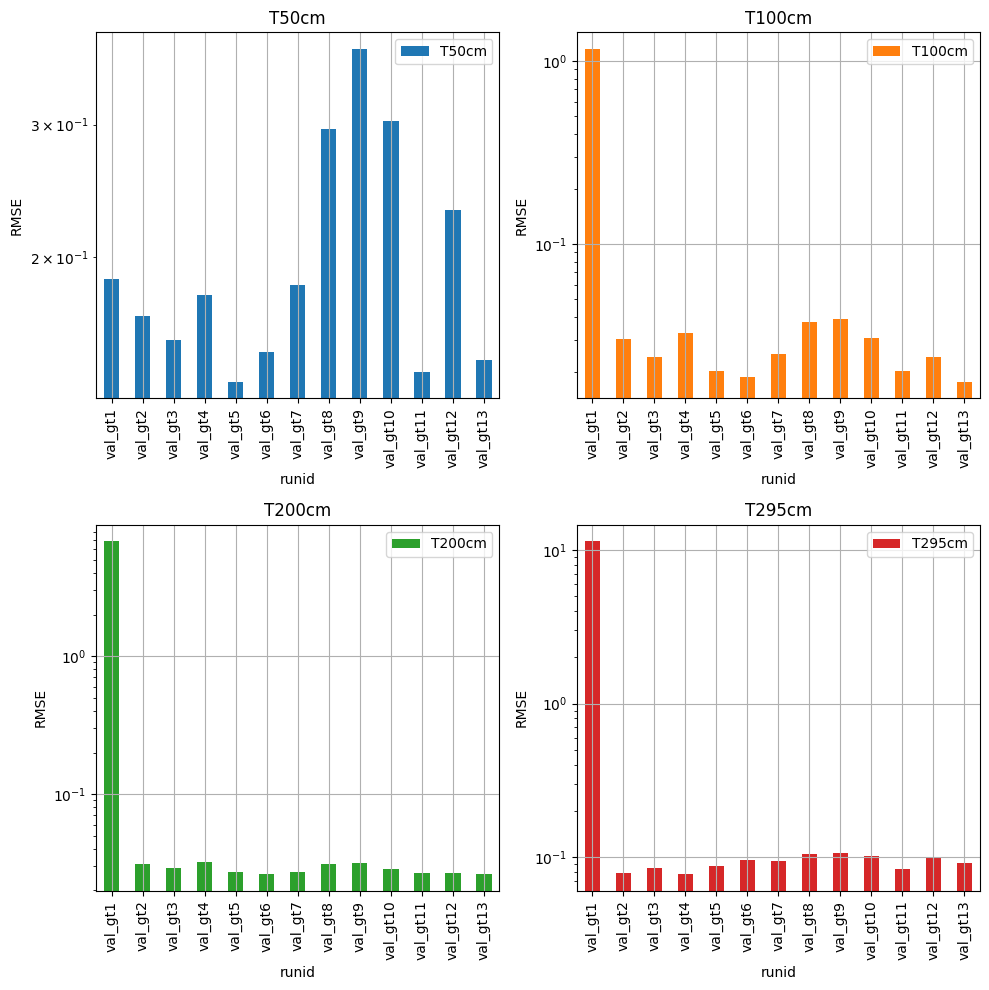

In [45]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

df_rmse.plot.bar(subplots=True, ax=axs, logy=True)

for array in axs:
    for ax in array:
        ax.set_xticks(np.arange(len(df_rmse)), df_rmse.runid.values)
        
        ax.set_xlabel('runid')
        ax.set_ylabel('RMSE')
        
        ax.grid()

fig.tight_layout()
fig.show()
    